# SIT 720 Assignment 2
Bryon Baker

Student number: 85031775

# Install required libraries

In [1]:
!pip3 install pandas
!pip3 install numpy
!pip3 install matplotlib

You should consider upgrading via the '/opt/app-root/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/app-root/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/app-root/bin/python3.8 -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the SCADI Dataset

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

url = 'https://raw.githubusercontent.com/bryonbaker/datasets/main/SIT720/Ass2/SCADI.csv'
full_df = pd.read_csv(url)
print(f"{full_df.head()}\n")

   Gender  Age  d 5100-0  d 5100-1  d 5100-2  d 5100-3  d 5100-4  d 5100-8  \
0       0   18         0         0         0         0         1         0   
1       0   22         0         0         0         0         1         0   
2       0   18         0         0         0         1         0         0   
3       1   18         0         0         0         0         1         0   
4       0   19         0         0         0         0         1         0   

   d 5100-9  d 5101-0  ...  d 57022-8  d 57022-9  d 571-0  d 571-1  d 571-2  \
0         0         0  ...          0          0        0        0        0   
1         0         0  ...          0          0        0        0        0   
2         0         0  ...          0          0        0        0        0   
3         0         0  ...          0          0        0        0        1   
4         0         0  ...          0          0        0        0        1   

   d 571-3  d 571-4  d 571-8  d 571-9  Classes  
0      

In [4]:
# Display stats on the data frame
shape = full_df.shape
print(f"Initial shape: {shape}")

Initial shape: (70, 206)


# Question 1
1. Determine the number of subgroups (clusters) from the dataset using attributes 3-255.
2. Is this the same as the number of classes presented by attribute 206 (Classes)? 
3. Explain and justify your findings.

In [5]:
# Count the number of classes in the dataset before we drop the column. This is used in Question 3
num_classes_in_dataset = full_df['Classes'].nunique()
print(f"Number of unique classes in the original dataset is: {num_classes_in_dataset}")

# Drop attributes: 1, 2, and 205
df = full_df.drop(["Gender","Age","Classes"], axis=1)
shape = df.shape
print(f"New shape: {shape}")
print(f"{df.head()}")

Number of unique classes in the original dataset is: 7
New shape: (70, 203)
   d 5100-0  d 5100-1  d 5100-2  d 5100-3  d 5100-4  d 5100-8  d 5100-9  \
0         0         0         0         0         1         0         0   
1         0         0         0         0         1         0         0   
2         0         0         0         1         0         0         0   
3         0         0         0         0         1         0         0   
4         0         0         0         0         1         0         0   

   d 5101-0  d 5101-1  d 5101-2  ...  d 57022-4  d 57022-8  d 57022-9  \
0         0         0         0  ...          0          0          0   
1         0         0         0  ...          0          0          0   
2         0         0         0  ...          0          0          0   
3         0         0         0  ...          0          0          0   
4         0         0         0  ...          0          0          0   

   d 571-0  d 571-1  d 571-2  d 57

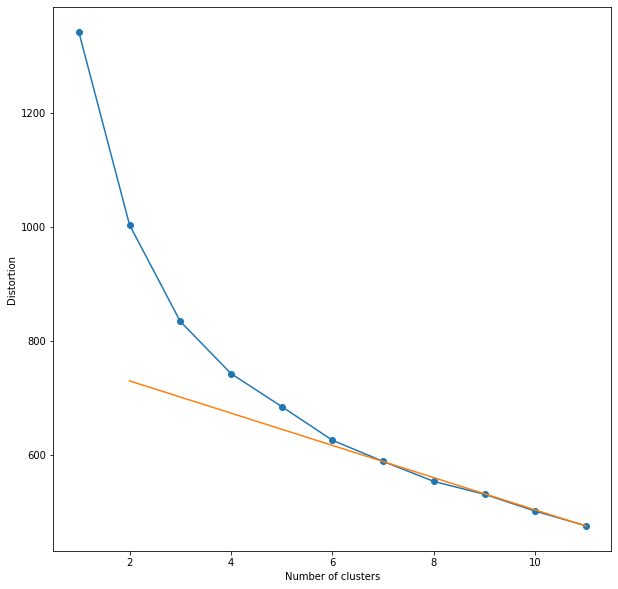

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

distortions = []
ref_xLine = [2,11]
ref_yLine = [625, 475]

min_k = 1
max_k = 12
for n in range(min_k,max_k):
    km = KMeans( n_clusters=n, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0 )
    y_km = km.fit(df)
    distortions.append(km.inertia_)

# Calculate the co-ordinates of the reference line that passes through the points at k=6 and k = 11
x1 = num_classes_in_dataset
x2 = max_k-1
y1 = distortions[num_classes_in_dataset-1]
y2 = distortions[max_k-2]
m =  (y2 - y1) / (x2 - x1)
c = y1 - (m * x1)
ref_y1 = (m * 2) + c    # Calc the left of the reference line
ref_yLine[0] = ref_y1
    
# Scale the plot so the reference line is more distinct form the reference line
fig = plt.figure()
fig.set_size_inches(10,10)

# plot the elbow chart and include a reference line based on the number of classes in the dataset.
plt.plot(range(min_k, max_k), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

# Plot the reference line to highlight where the elbow is located.
# The reference line is used to help discuss any differences between optimal clusters from the elbow versus what is in the dataset.
plt.plot(ref_xLine, ref_yLine, label = "line 1")

plt.show()

## Discussion
Based on a visual inspection of the elbow chart the number of clusters is between 3 and 6. This range is because the gradient gradually flattens out from 3 to 6.

The orange reference line is intended to illustrate where the curve has properly flattened. The line passes through the actual number of classes in the dataset. This is intended to illustrate the limitations of visual inspection to identify the elbow and answer the question "should I look for the elbow at the start or the end of the curve?"

Even with the reference line, it is questionable as to whether the optimal number of clusters is 6 or 7. Scaling the above chart will possibly lead a different conclusion.

There are other more empiricle methods such as the silhouette method (Kaufman and Rousseeuw [1990]) that can be used to determine the optimal clusters

# Question 2
For the dataset, perform PCA. 
1. plot the captured variance with respect to increasing latent dimensionality.

   What is the minimum dimension that captures:
    - At least 89% variance
    - At least 99% variance

Number of comoponets: 70
PCA details => PCA(n_components=70)
Explained Variance:
[1.88806809e-01 1.40294493e-01 9.28576978e-02 5.55026572e-02
 4.61869047e-02 4.34725875e-02 3.69877993e-02 3.13335959e-02
 2.84580857e-02 2.76366269e-02 2.54158872e-02 2.29197949e-02
 2.19763646e-02 1.99686493e-02 1.71542044e-02 1.68217640e-02
 1.49495489e-02 1.35025077e-02 1.30312569e-02 1.21237442e-02
 1.17685546e-02 9.66224236e-03 8.63248486e-03 7.84566734e-03
 7.59307576e-03 7.12095577e-03 6.55889086e-03 6.12964769e-03
 5.91117990e-03 5.17548744e-03 5.03651222e-03 4.65382307e-03
 4.39521523e-03 4.10905658e-03 3.56350637e-03 3.48557543e-03
 3.19702197e-03 2.97311722e-03 2.42793434e-03 2.24198157e-03
 2.01187470e-03 1.91211156e-03 1.86048071e-03 1.69712604e-03
 1.56776044e-03 1.23397690e-03 1.10068456e-03 9.44378334e-04
 9.25930483e-04 7.94493095e-04 6.85276056e-04 5.32382661e-04
 5.02833242e-04 4.16181322e-04 3.63010110e-04 3.39694589e-04
 2.48292321e-04 2.40044414e-04 1.69408256e-04 1.53845295e-04
 1.3

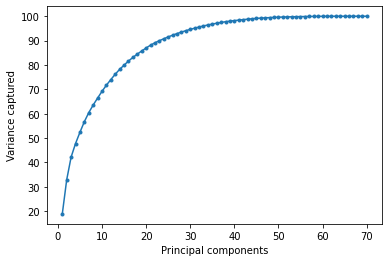

Minimum dimension for at least 89% variance is:  21
Minimum dimension for at least 99% variance is:  44


In [7]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

# Normalise all of the data to ensure they are of similar magnitude.
Xnorm = scale(df)

# Perform the Principal Component Analysis. The number of components is the number of coumns in the dataset.
# The number of components is the minimum of the number of data elements and festures 
n_components=min(df.shape[0], df.shape[1])
print("Number of comoponets: {}".format(n_components))
pca = PCA(n_components)
pca.fit(Xnorm)
print("PCA details => {}".format(pca))

print('='*50)
print("Explained Variance:")
# Calculate the amount of variance explained by each PC
var= pca.explained_variance_ratio_
print(var)

print('='*50)
print("Cumulative Explained Variance:")

cum_var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(cum_var)

pca_num = a_list = list(range(1, n_components+1))
plt.plot(pca_num, cum_var, marker='.')
plt.xlabel("Principal components")
plt.ylabel("Variance captured")
plt.show()

dimensions = {}

# Find the minimum dimensions that capture 89% and 99% respectively
num_dimensions = next(k for k, value in enumerate(cum_var) if value >= 89) 
print("Minimum dimension for at least 89% variance is: ", num_dimensions)
dimensions[89] = num_dimensions

num_dimensions = next(k for k, value in enumerate(cum_var) if value >= 99) 
print("Minimum dimension for at least 99% variance is: ", num_dimensions)
dimensions[99] = num_dimensions

print('='*50)



# Question 3
Determine the purity of the clusters formed by the number of principal components that captured 89% and 99% variances respectively. Plot a line ghraph of the purity scores against the captured variances.

Discuss your findings.

### Helper functions
The following code segment defines some helper functions for calculating clulstering purity

In [25]:
# Takes a list that may contain duplicates and returns a list with unique ites.
def uniqueList(list1):
    # insert the list to the set
    list_set = set(list1)
    # convert the set to the list
    unique_list = (list(list_set))
    unique_list.sort()
    return unique_list

# Searches a Series and finds the item that appears with the greatest frequency and returns the count.
def findMaxLabel( data ):
    unique, counts = np.unique(data, return_counts=True)
    # print(np.asarray((unique, counts)).T)
    idx = np.argmax(counts, axis=0)
    # print(f"Index of max: {idx}")

    return unique[idx], counts[idx]

# Given a dataframe of columns "cluster" and "label", it calculates the cluster purity
def calculatePurity(data):
    print("Calculating clustering purity.")
    print("Input data:\n{}".format(data))
          
    assert data.shape[1] > 0        # Check we won't have a divide by zero error later

    # Get a list of clusters that has no duplicates so we can use it as a key.
    clusterList = uniqueList(data['cluster'])
    # print(f"Cluster list: {clusterList}")

    # Go through each cluster one by one.
    runningSum = 0
    for c in clusterList:
        # print(f"Counting instances in cluster {c}")
        m1,m2 = findMaxLabel(data[data["cluster"] == c]["label"])
        print("Maximum frequency in cluster {} is label {}. It has a count of {}.".format(c,m1,m2))
        runningSum = runningSum + m2

    purity = runningSum / data.shape[0]

    return purity
    

### Calculate Purity

In [26]:
# Using the optimal number of clusters found in question 1, perform a K-Means clustering for the num_dimensions found in question 2 and calculate the purity score
# To measure pruity we need to count the majority label in a cluster and assign the cluster that label. However, the labels have been removed because we to not want the label to be part of the clustering.
# This method therefore will perform k-means on the non-PCA dataset and 

# Using the dictionary of cumulative variance and number of principal components created in the earlier question
# Calculate the purity score for each.
for percentage in dimensions:
    n = dimensions[percentage]
    print(f"Calculate the the purity score for {percentage}% CV using {n} dimensions:")
    print("="*60+"\n")
    
    # Perform the dimensionality reduction
    pca = PCA(n_components=n)
    Zred = pca.fit_transform(Xnorm)
    print("Xnorm shape: {}".format(Xnorm.shape))
    print("Zred shape: {}".format(Zred.shape))
    
    # Perform the K-Means clustering. Given the anlysis in Q1 we will use the number of classes in the original dataset for this clustering activity.
    km = KMeans( n_clusters=num_classes_in_dataset, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0 )
    km.labels = original_labels
    y_km = km.fit(Zred)
    d = pd.concat([pd.Series(y_km.labels_),pd.Series(original_labels.array)], axis=1)
    d.columns = ['cluster', 'label']
    # print("Allocation of labels to clusters is:\n{}".format(d))
    purity = calculatePurity(d)
    print(f"Purity score is: {purity}")   
    print("="*60+"\n")
    

Calculate the the purity score for 89% CV using 21 dimensions:

Xnorm shape: (70, 203)
Zred shape: (70, 21)
Calculating clustering purity.
Input data:
    cluster  label
0         2      6
1         2      6
2         2      6
3         2      6
4         2      6
..      ...    ...
65        6      4
66        6      3
67        2      6
68        2      6
69        2      6

[70 rows x 2 columns]
Maximum frequency in cluster 0 is label 7. It has a count of 5.
Maximum frequency in cluster 1 is label 6. It has a count of 1.
Maximum frequency in cluster 2 is label 6. It has a count of 27.
Maximum frequency in cluster 3 is label 2. It has a count of 5.
Maximum frequency in cluster 4 is label 7. It has a count of 6.
Maximum frequency in cluster 5 is label 4. It has a count of 10.
Maximum frequency in cluster 6 is label 7. It has a count of 5.
Purity score is: 0.8428571428571429

Calculate the the purity score for 99% CV using 44 dimensions:

Xnorm shape: (70, 203)
Zred shape: (70, 44)
Cal

### Plot the Graphs


## Discussion